In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("2025-11-16_12-10-27-298.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,2.980313,-0.060312,-0.319688,0.000000e+00,2.000000e-09
1,2.940625,-0.040000,-0.279062,2.000000e-09,NaN
2,2.920469,-0.010078,-0.360625,4.000000e-09,NaN
3,2.960469,-0.050391,-0.280000,6.000000e-09,NaN
4,2.959844,-0.059766,-0.399687,8.000000e-09,NaN


In [16]:
Ts = df.Ts.values[0]

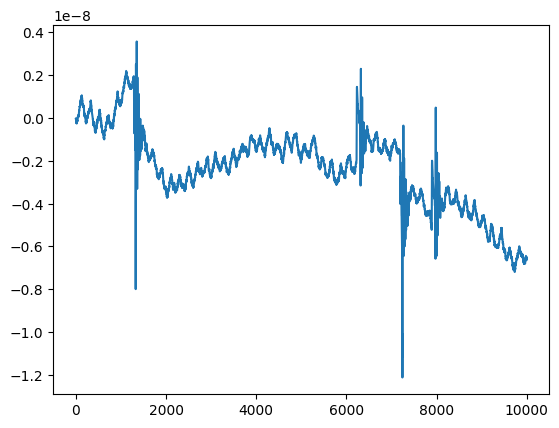

In [24]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values*100 # x100 probe
il = il -il[:500].mean()
# rogowski coil
id_d= df.CH2.values
id_d = id_d -id_d[:500].mean()
Id = np.cumsum(id_d)*Ts
plt.plot(Id)

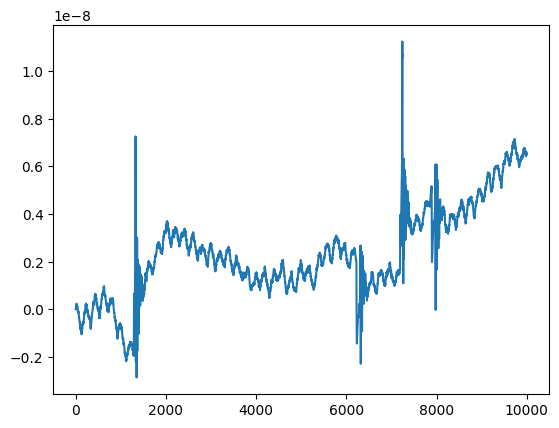

In [25]:
import scipy 
Id= scipy.integrate.cumulative_trapezoid(y= id_d, dx =Ts, initial = 0)
plt.plot(-Id)

# R05F

### TEST1 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("2025-11-16_13-05-28-825.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,3.060156,-0.050156,-0.320625,0.000000e+00,2.000000e-09
1,3.120156,-0.000078,-0.319375,2.000000e-09,NaN
2,3.099375,-0.040000,-0.240000,4.000000e-09,NaN
3,3.019687,-0.030000,-0.240313,6.000000e-09,NaN
4,3.020000,-0.029219,-0.198750,8.000000e-09,NaN


In [28]:
Ts = df.Ts.values[0]

(-2.0, 15.0)

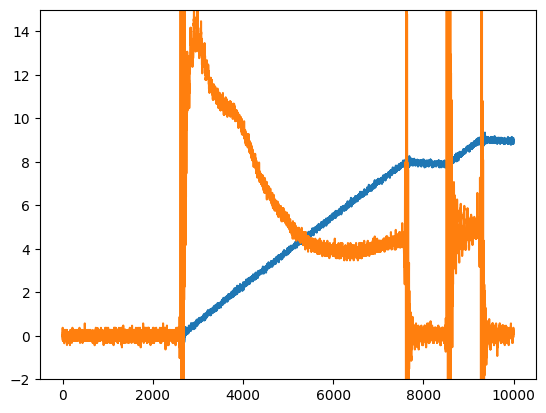

In [31]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
iD =  df.CH2.values # x100 probe
iD = iD -iD[:500].mean()
iD = iD /0.05 # v= ri , r = R150
iD = iD/2
plt.plot(il)
plt.plot(iD)
plt.ylim([-2,15])

(-2.0, 15.0)

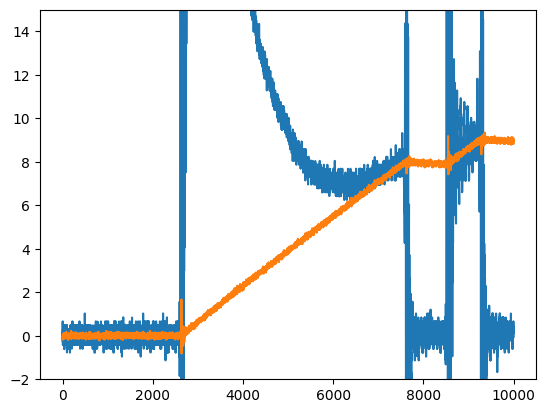

In [38]:
iD2 = iD*1.8
plt.plot(iD2)
plt.plot(il)
plt.ylim([-2,15])

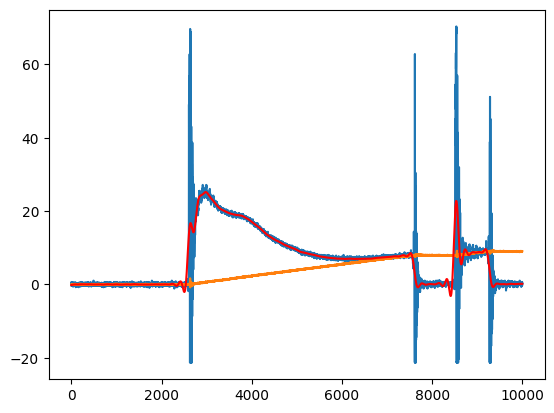

In [43]:
import numpy as np
from scipy.signal import butter, sosfiltfilt

#Ts = 4e-9           # 4 ns
Fs = 1 / Ts         # 250 MHz
fc = 3e6        # 200 kHz
wn = fc / (Fs/2)    # normalized cutoff

# Zero-phase low-pass (Butterworth IIR + filtfilt)
sos = butter(6, wn, btype='low', output='sos')  # order 6 is a good start
iD3= sosfiltfilt(sos, iD2)                # zero group delay
plt.plot(iD2)
plt.plot(il)
plt.plot(iD3, c="r")

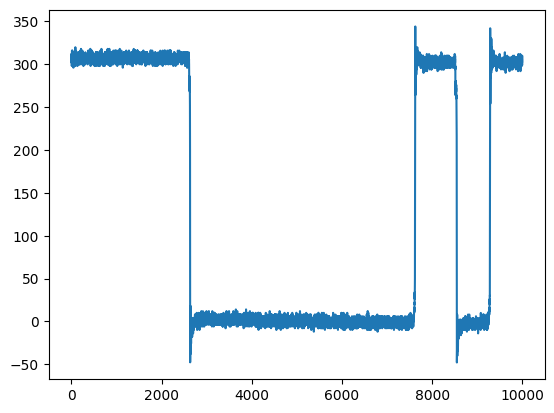

In [44]:
plt.plot(vds)

Eon µJ 856.8312155033203


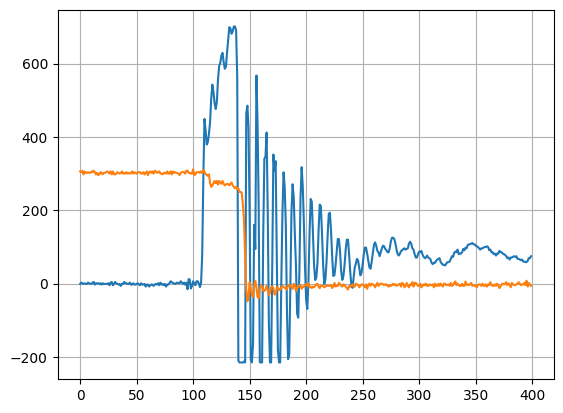

In [76]:
n1_on= 8400
n2_on= 8800
id_ = iD2 [n1_on:n2_on]
id_= id_-id_[:50].mean()

vds_= vds [n1_on:n2_on]
pon = id_*vds_
Eon = np.sum(pon)*Ts
plt.plot(id_*10)
plt.plot(vds_)
plt.grid()
print("Eon µJ", Eon*1e6)

Eoff µJ 64.87333869902344


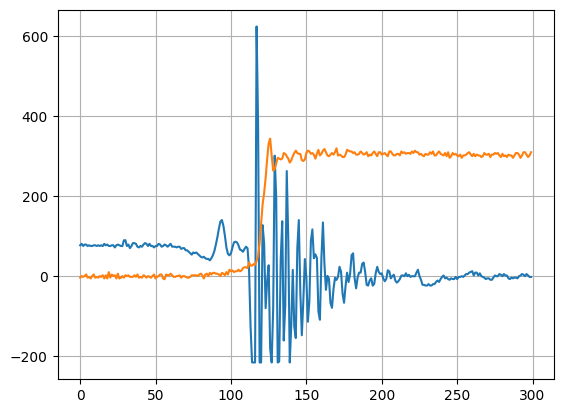

In [75]:
n1_off= 7500
n2_off= 7800
id_ = iD2 [n1_off:n2_off]
id_= id_-id_[-50:].mean()
vds_= vds [n1_off:n2_off]
poff = id_*vds_
Eoff = -np.sum(poff)*Ts
plt.plot(id_*10)
plt.plot(vds_)
plt.grid()
print("Eoff µJ", Eoff*1e6)

In [73]:
Eonoff= Eon+Eoff
fsw=100e3
print("Eon µJ", Eon*1e6)
print("Eoff µJ", Eoff*1e6)

print("Eonoff µJ", Eonoff*1e6)
print(f"Psw at {fsw} Hz = {Eonoff*fsw} W")

Eon µJ 856.8312155033203
Eoff µJ 64.87333869902344
Eonoff µJ 921.7045542023437
Psw at 100000.0 Hz = 92.17045542023438 W


In [ ]:
#

### TEST2

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df = pd.read_csv("2025-11-16_13-23-29-846.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,3.200625,-0.019844,-0.200000,0.000000e+00,2.000000e-09
1,3.061094,-0.080156,-0.281562,2.000000e-09,NaN
2,3.099844,-0.020156,-0.160000,4.000000e-09,NaN
3,2.999688,-0.050000,-0.280313,6.000000e-09,NaN
4,3.040781,-0.030000,-0.200000,8.000000e-09,NaN


In [79]:
Ts = df.Ts.values[0]

(-2.0, 15.0)

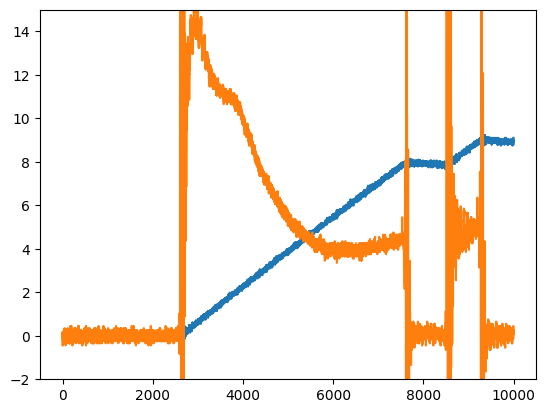

In [80]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
iD =  df.CH2.values # x100 probe
iD = iD -iD[:500].mean()
iD = iD /0.05 # v= ri , r = R150
iD = iD/2
plt.plot(il)
plt.plot(iD)
plt.ylim([-2,15])

(-2.0, 15.0)

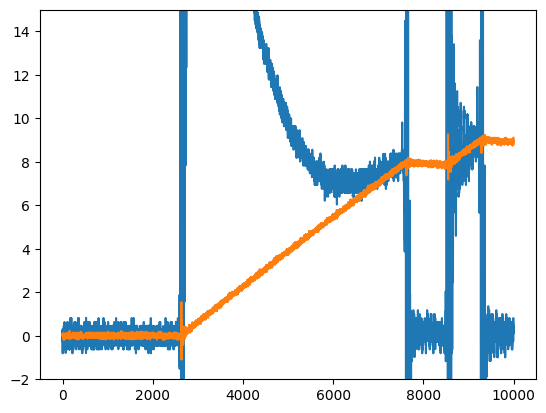

In [81]:
iD2 = iD*1.8
plt.plot(iD2)
plt.plot(il)
plt.ylim([-2,15])

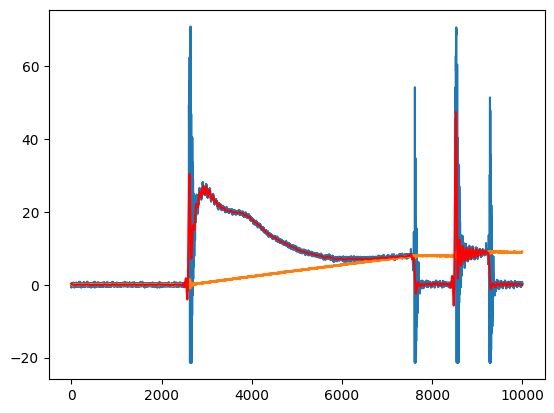

In [88]:
import numpy as np
from scipy.signal import butter, sosfiltfilt

#Ts = 4e-9           # 4 ns
Fs = 1 / Ts         # 250 MHz
fc = 8e6        # 200 kHz
wn = fc / (Fs/2)    # normalized cutoff

# Zero-phase low-pass (Butterworth IIR + filtfilt)
sos = butter(6, wn, btype='low', output='sos')  # order 6 is a good start
iD3= sosfiltfilt(sos, iD2)                # zero group delay
plt.plot(iD2)
plt.plot(il)
plt.plot(iD3, c="r")

In [ ]:
vds

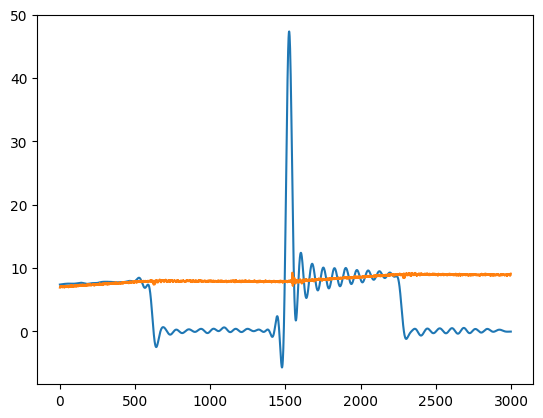

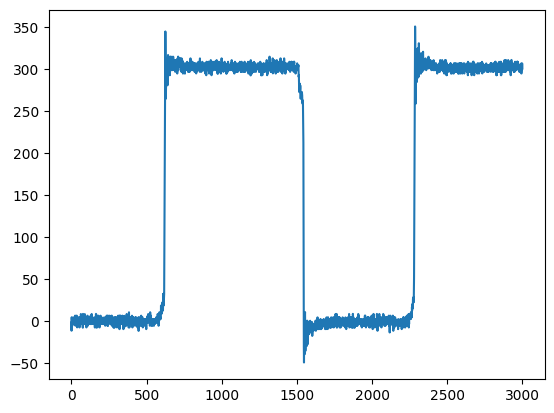

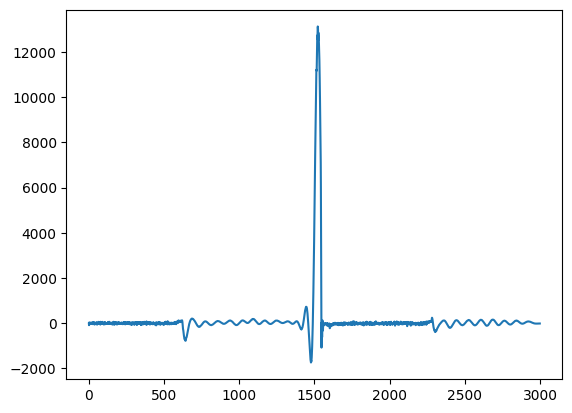

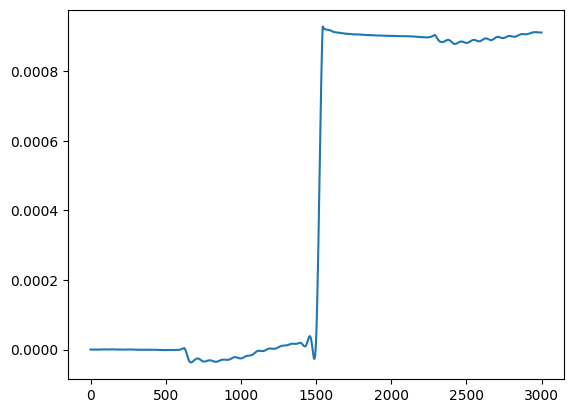

In [109]:
n1= 7000
n2= 10000


id_ = iD3 [n1:n2]
#id_= id_-id_[:50].mean()
il_= il [n1:n2]
#id_= il_-il_[:50].mean()

vds_= vds [n1:n2]
vds_ = vds_-vds_[:200].mean()#+1
P = id_*vds_
E= np.cumsum(P)*Ts


plt.plot(id_)
plt.plot(il_)
plt.show()
plt.plot(vds_)
plt.show()
plt.plot(P)
plt.show()
plt.plot(E)

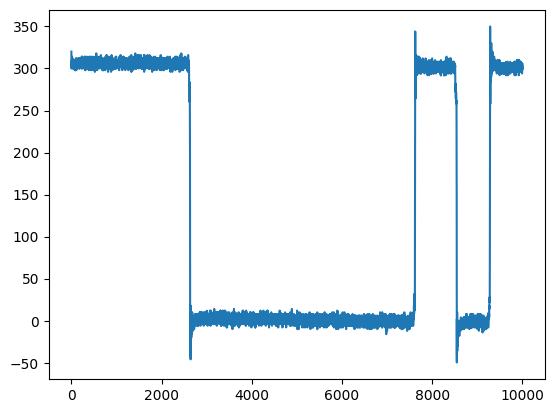

In [110]:
plt.plot(vds)

Eon µJ 862.375441921875


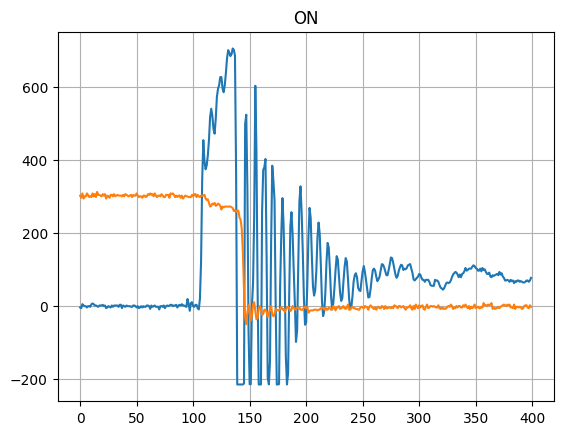

In [117]:
n1_on= 8400
n2_on= 8800
id_ = iD2 [n1_on:n2_on]
id_= id_-id_[:50].mean()

vds_= vds [n1_on:n2_on]
pon = id_*vds_
Eon = np.sum(pon)*Ts
plt.plot(id_*10)
plt.plot(vds_)
plt.grid()
plt.title("ON")
print("Eon µJ", Eon*1e6)

Eoff µJ 58.818522659765634


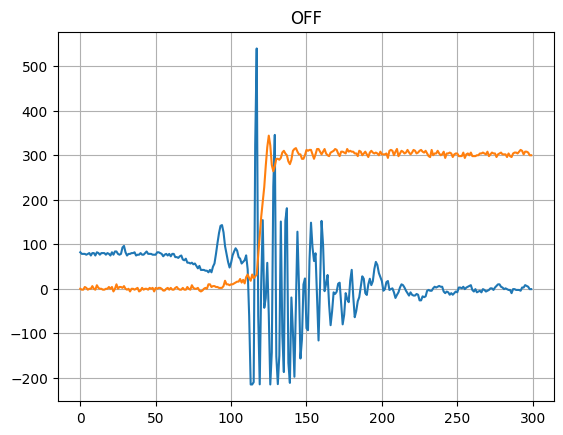

In [115]:
n1_off= 7500
n2_off= 7800
id_ = iD2 [n1_off:n2_off]
id_= id_-id_[-50:].mean()
vds_= vds [n1_off:n2_off]
poff = id_*vds_
Eoff = -np.sum(poff)*Ts
plt.plot(id_*10)
plt.plot(vds_)
plt.grid()
plt.title("OFF")
print("Eoff µJ", Eoff*1e6)

In [113]:
Eonoff= Eon+Eoff
fsw=100e3
print("Eon µJ", Eon*1e6)
print("Eoff µJ", Eoff*1e6)

print("Eonoff µJ", Eonoff*1e6)
print(f"Psw at {fsw} Hz = {Eonoff*fsw} W")

Eon µJ 862.375441921875
Eoff µJ 58.818522659765634
Eonoff µJ 921.1939645816407
Psw at 100000.0 Hz = 92.11939645816406 W


In [148]:
R=100
C = 1e-9
RC= R*C
W0= 1/RC
1e-6*W0/(2*3.14)

1.592356687898089

Eoff µJ 58.818522659765634


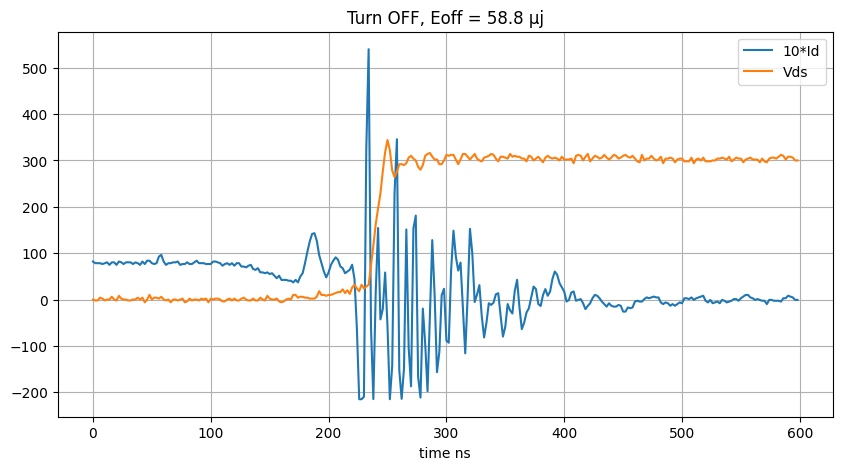

In [146]:
plt.subplots(figsize = (10,5))
n1_off= 7500
n2_off= 7800
id_ = iD2 [n1_off:n2_off]
id_= id_-id_[-50:].mean()
vds_= vds [n1_off:n2_off]
poff = id_*vds_
Eoff = -np.sum(poff)*Ts
t= np.arange(0, len(id_)*Ts , Ts)*1e9
plt.plot(t, id_*10, label = "10*Id" )
plt.plot(t, vds_, label = "Vds")
plt.grid()
plt.title(f"Turn OFF, Eoff = {Eoff*1e6:.1f} µj")
plt.xlabel("time ns")
plt.legend()
print("Eoff µJ", Eoff*1e6)

(180.0, 280.0)

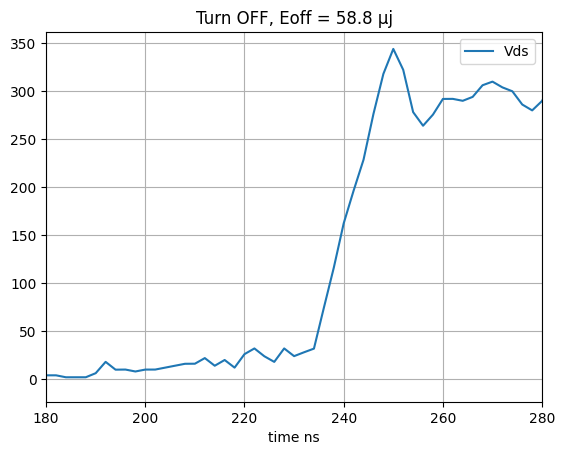

In [144]:
#plt.plot(t, id_*10, label = "10*Id" )
plt.plot(t, vds_, label = "Vds")
plt.grid()
plt.title(f"Turn OFF, Eoff = {Eoff*1e6:.1f} µj")
plt.xlabel("time ns")
plt.legend()
plt.xlim([180,280])

# Test 3 rogowski coil

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [298]:
df = pd.read_csv("2025-11-16_18-43-46-473.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,2.920000,-0.440625,-0.479687,0.000000e+00,2.000000e-09
1,2.899688,-0.540312,-0.479063,2.000000e-09,NaN
2,2.859844,-0.459062,-0.400625,4.000000e-09,NaN
3,2.919688,-0.480781,-0.519375,6.000000e-09,NaN
4,2.940781,-0.500469,-0.446562,8.000000e-09,NaN


In [299]:
Ts = df.Ts.values[0]

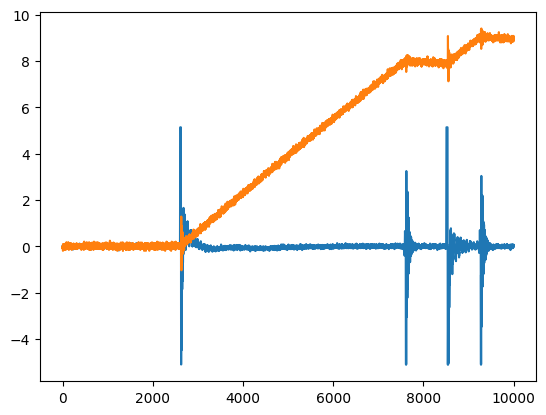

In [300]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

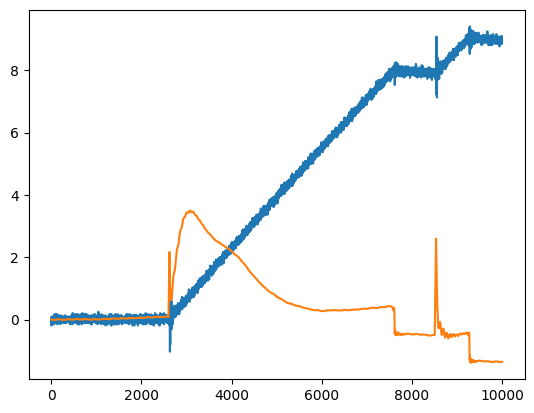

In [301]:
k= 1e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

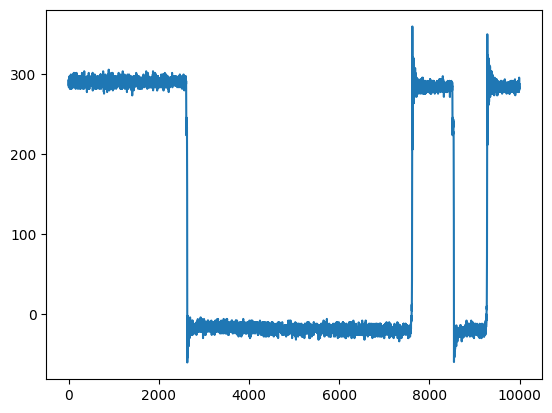

In [302]:
plt.plot(vds)

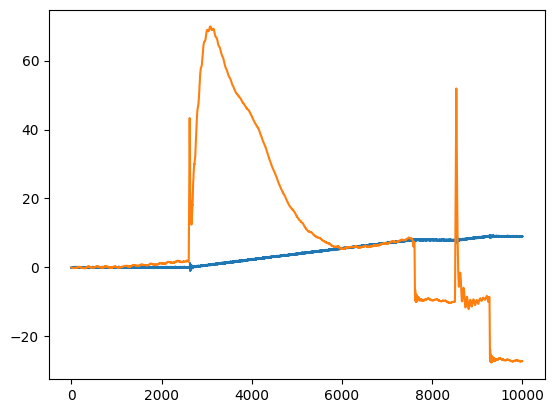

In [303]:
k= 20e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

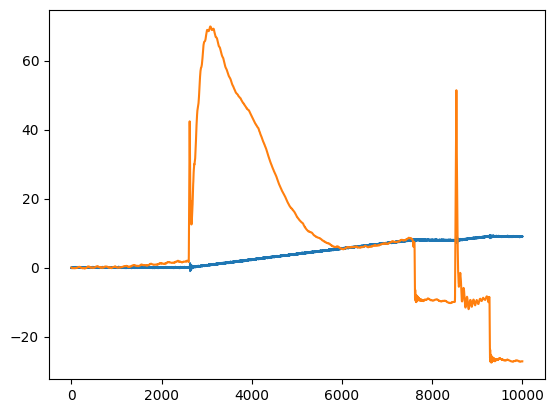

In [304]:
import scipy 



k= 20e7 

iD=  k*scipy.integrate.cumulative_trapezoid(y= diD, dx =Ts, initial = 0)
plt.plot(il)
plt.plot(iD)

Eoff µJ 12.97999751963354


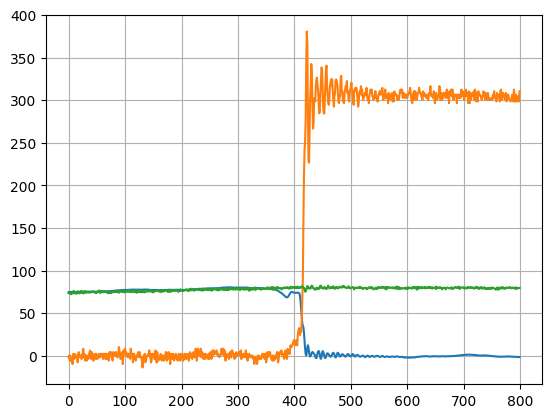

In [315]:
n1_on= 6000+1200
n2_on= 8000


vds_= vds[n1_on:n2_on]
vds_ = vds_-vds_[:150].mean()
id_= iD[n1_on:n2_on]
id_ = id_ -id_[-150:].mean()
k= 0.45
id_ = id_*k
poff= id_*vds_
Eoff= np.sum(poff)*Ts
plt.plot(id_*10)
plt.plot(vds_)
il_= il[n1_on:n2_on]
#plt.plot(poff)
plt.grid()
plt.plot(il_*10)
print("Eoff µJ", Eoff*1e6)


# Test 4 rogowski coil

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [168]:
df = pd.read_csv("2025-11-16_18-51-48-777.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,2.960469,-0.380000,-0.400625,0.000000e+00,2.000000e-09
1,3.060156,-0.380000,-0.280000,2.000000e-09,NaN
2,3.020313,-0.380156,-0.199687,4.000000e-09,NaN
3,2.960000,-0.400000,-0.240000,6.000000e-09,NaN
4,3.040000,-0.420312,-0.439688,8.000000e-09,NaN


In [169]:
Ts = df.Ts.values[0]

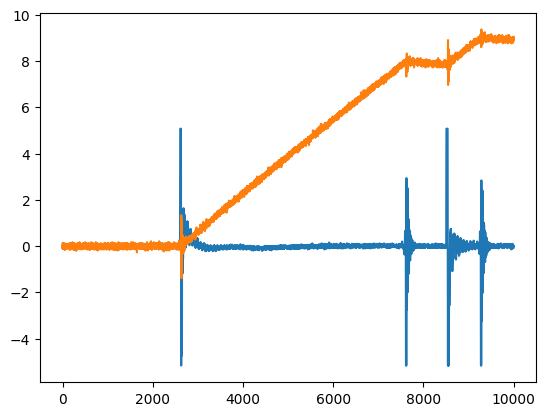

In [170]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

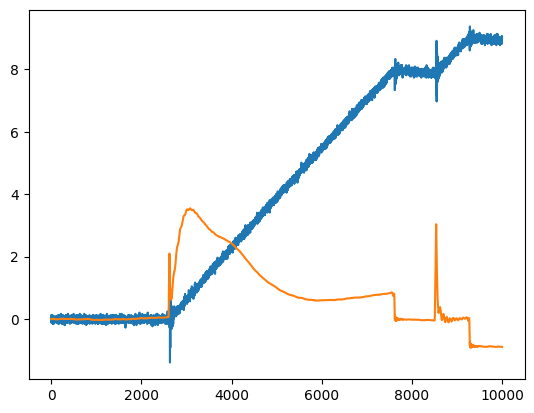

In [171]:
k= 1e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

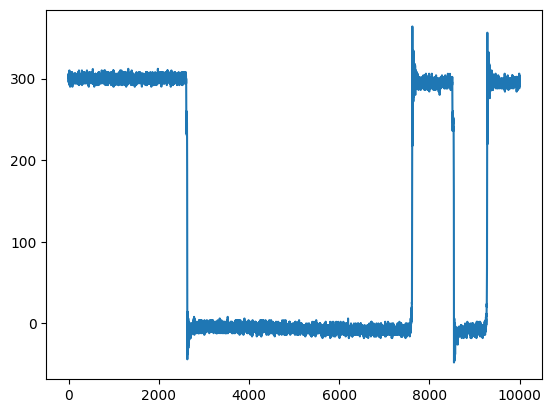

In [172]:
plt.plot(vds)

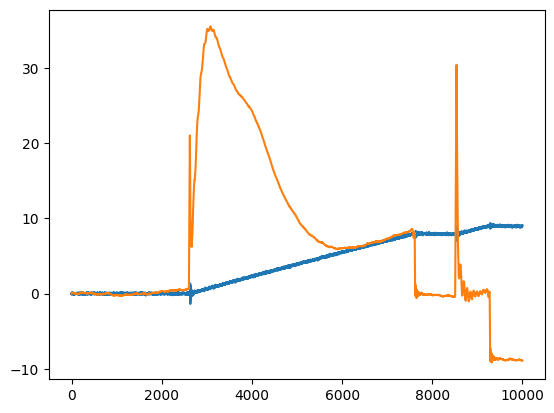

In [175]:
k= 10e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

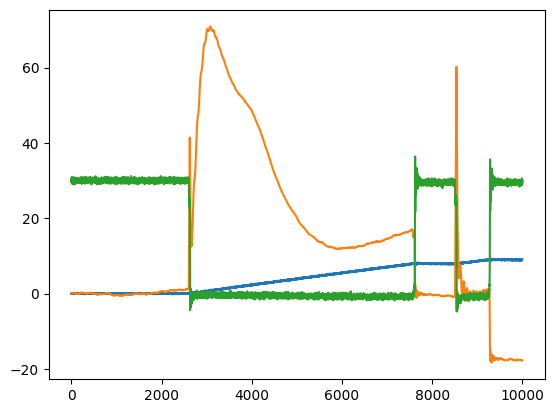

In [179]:
import scipy 



k= 20e7 
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

iD=  k*scipy.integrate.cumulative_trapezoid(y= diD, dx =Ts, initial = 0)
plt.plot(il)
plt.plot(iD)
plt.plot(vds*0.1)

# Test 5 rogowski coil Rcoil = 220 instead of 50

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [181]:
df = pd.read_csv("2025-11-16_19-03-28-622.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,3.000000,-0.201563,-0.400000,0.000000e+00,2.000000e-09
1,3.060000,-0.598438,-0.277813,2.000000e-09,NaN
2,3.019844,-0.800000,-0.240313,4.000000e-09,NaN
3,3.060000,-0.600000,-0.280000,6.000000e-09,NaN
4,3.040156,-0.395313,-0.318437,8.000000e-09,NaN


In [182]:
Ts = df.Ts.values[0]

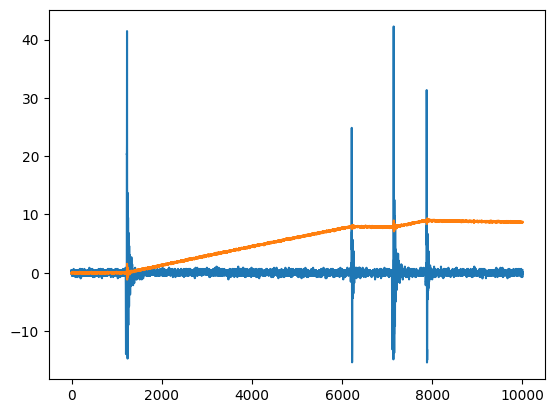

In [183]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

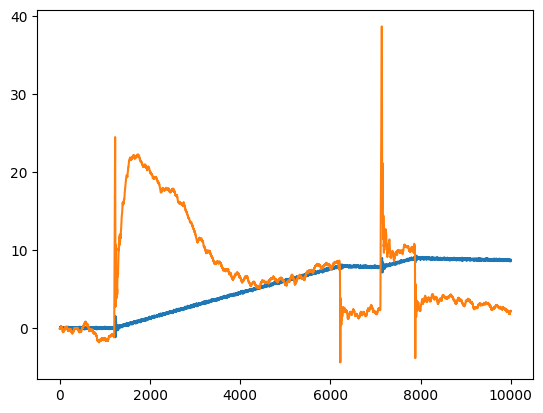

In [190]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(-iD)

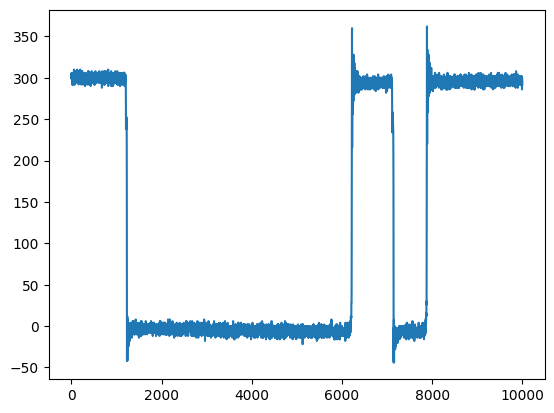

In [185]:
plt.plot(vds)

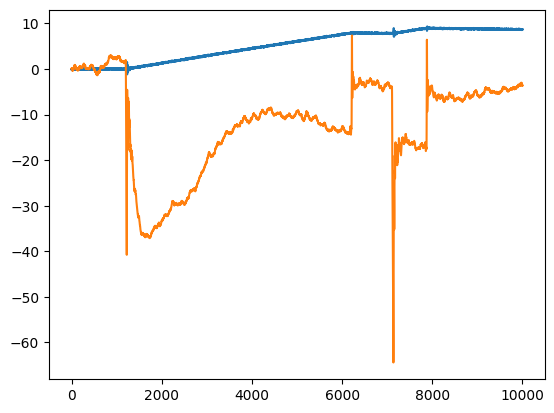

In [186]:
k= 10e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

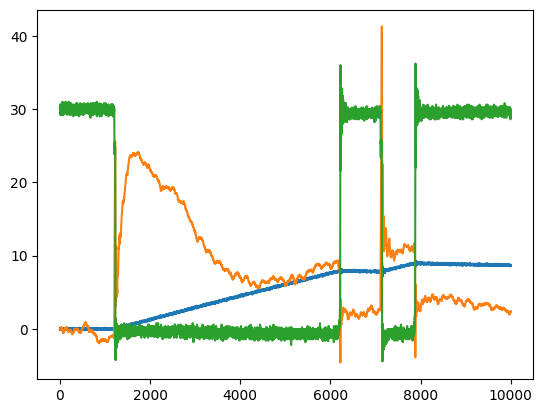

In [193]:
import scipy 



k= -6.5e7 
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

iD=  k*scipy.integrate.cumulative_trapezoid(y= diD, dx =Ts, initial = 0)
plt.plot(il)
plt.plot(iD)
plt.plot(vds*0.1)

# Test 6 rogowski coil Rcoil = 10 instead of 220

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [195]:
df = pd.read_csv("2025-11-16_19-07-50-851.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,2.940000,-0.356250,-0.356875,0.000000e+00,2.000000e-09
1,2.998594,-0.440000,-0.240313,2.000000e-09,NaN
2,3.039844,-0.400313,-0.320625,4.000000e-09,NaN
3,3.040156,-0.439688,-0.321250,6.000000e-09,NaN
4,2.980000,-0.440312,-0.399375,8.000000e-09,NaN


In [196]:
Ts = df.Ts.values[0]

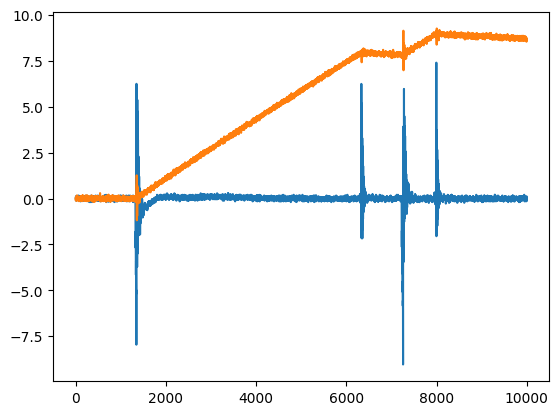

In [197]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

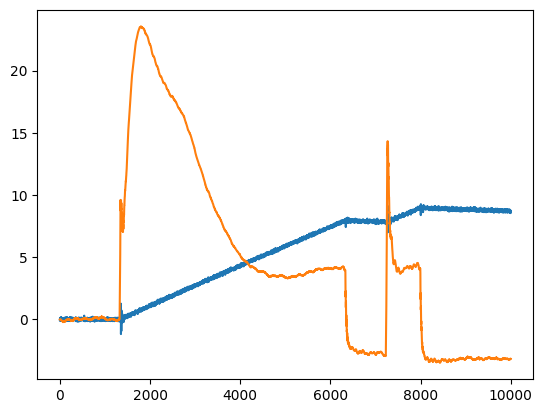

In [198]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(-iD)

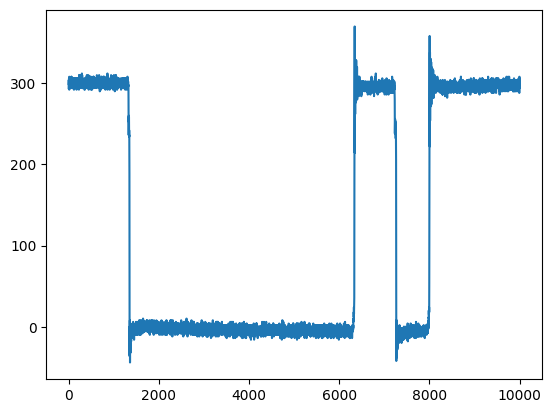

In [199]:
plt.plot(vds)

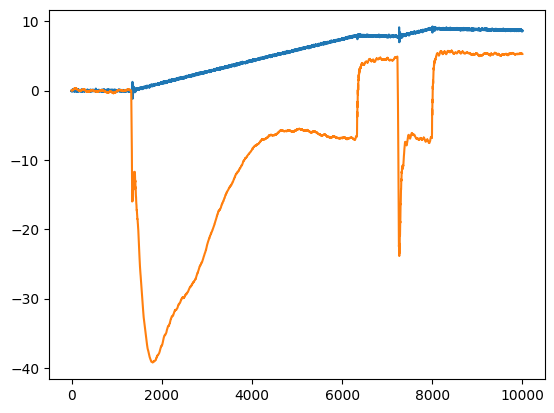

In [200]:
k= 10e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

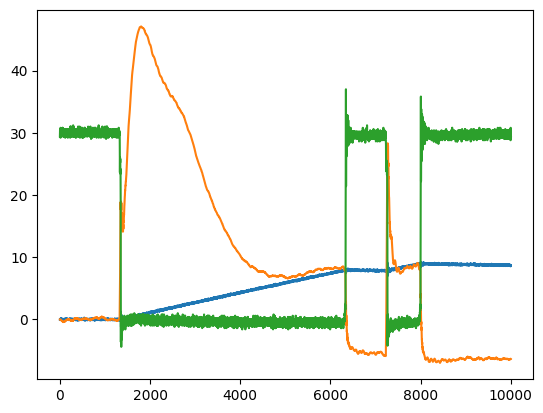

In [205]:
import scipy 



k= -12e7 
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

iD=  k*scipy.integrate.cumulative_trapezoid(y= diD, dx =Ts, initial = 0)
plt.plot(il)
plt.plot(iD)
plt.plot(vds*0.1)

# Test 7 rogowski coil Rcoil = 47 instead of 10

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [256]:
df = pd.read_csv("2025-11-16_19-12-23-250.csv")
df.head()

,CH1,CH2,CH3,time,Ts
0,3.040313,-0.500781,-0.360625,0.000000e+00,2.000000e-09
1,2.999531,-0.400000,-0.319688,2.000000e-09,NaN
2,2.999844,-0.400781,-0.279687,4.000000e-09,NaN
3,2.999688,-0.200781,-0.240000,6.000000e-09,NaN
4,3.020000,-0.398438,-0.201563,8.000000e-09,NaN


In [257]:
Ts = df.Ts.values[0]

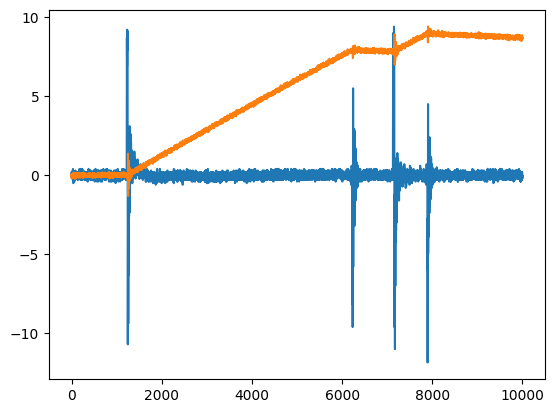

In [258]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

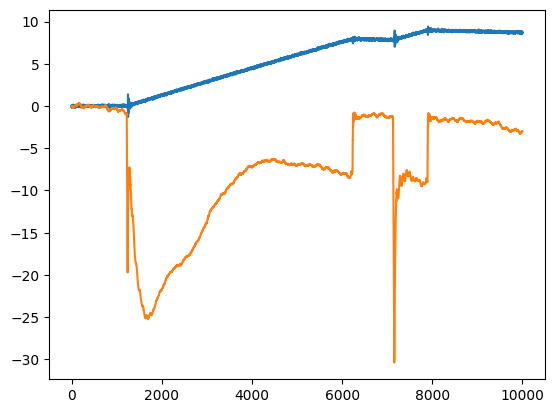

In [259]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(-iD)

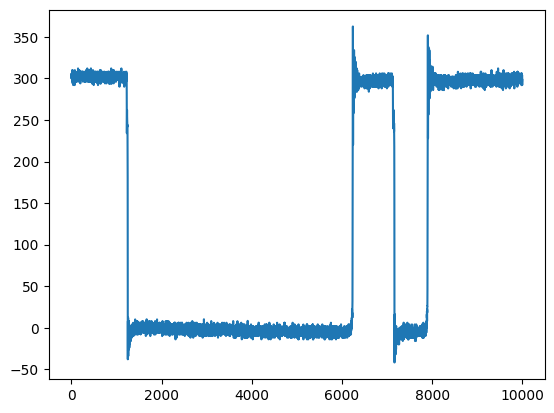

In [260]:
plt.plot(vds)

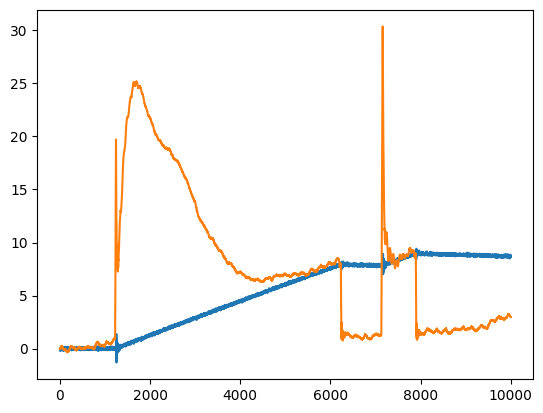

In [261]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

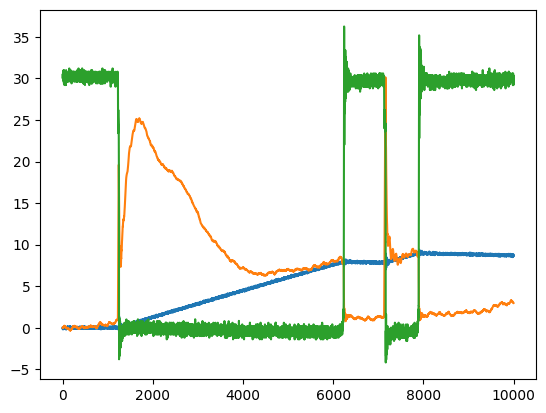

In [262]:
import scipy 



k= 6e7 
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

iD=  k*scipy.integrate.cumulative_trapezoid(y= diD, dx =Ts, initial = 0)
plt.plot(il)
plt.plot(iD)
plt.plot(vds*0.1)

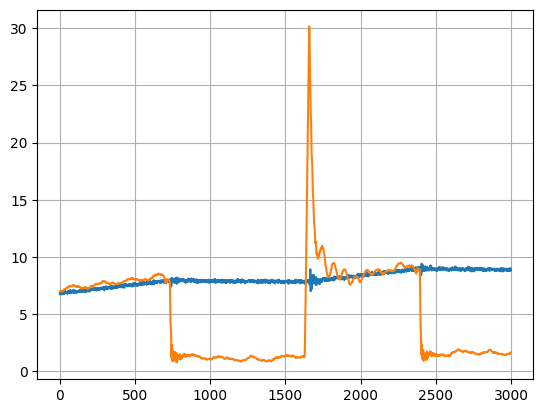

In [263]:
import scipy 


n1= 5500
n2= 8500

iD_= iD[n1:n2]
il_= il[n1:n2]
vds_= vds[n1:n2]
plt.plot(il_)
plt.plot(iD_)
plt.grid()

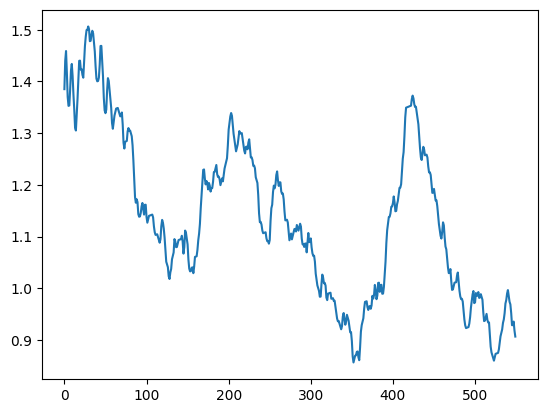

In [264]:
n3=850
n4 = 1400
plt.plot(iD_[n3:n4])

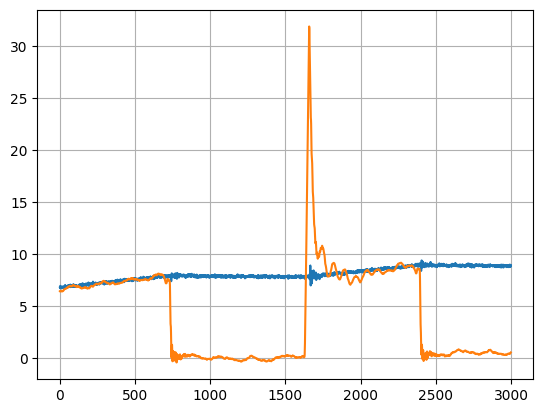

In [265]:
plt.plot(il_)
a=1.1
plt.plot(a*(iD_-iD_[n3:n4].mean()))
plt.grid()

In [277]:
Ts

np.float64(2e-09)

In [278]:
2000*10/1e4

2.0

Eoff µJ 7.667743874778308


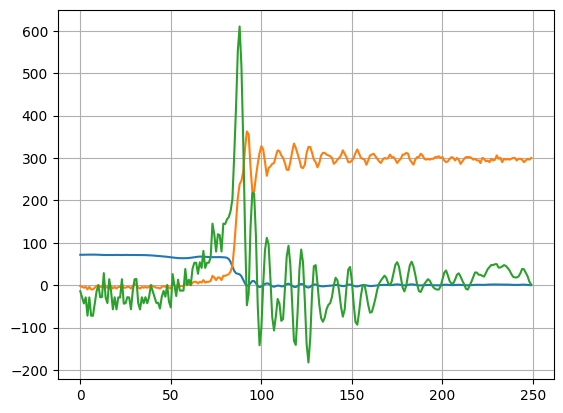

In [284]:
n1_on= 650
n2_on= 900


vds2_= vds_ [n1_on:n2_on]
id2_= iD_[n1_on:n2_on]
id2_ = id2_ -id2_[-150:].mean()
poff= id2_*vds2_
Eoff= np.sum(poff)*Ts
plt.plot(id2_*10)
plt.plot(vds2_)
plt.plot(poff)
plt.grid()
print("Eoff µJ", Eoff*1e6)


7.667743874778308


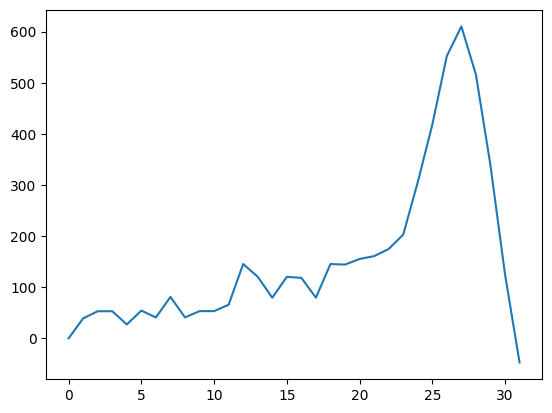

In [296]:
i = np.argmax(poff)
for j in range(i,len (poff)):
    if poff[j]<=0:
        break 
for k in range (i,0,-1):
    #print(k)
    if poff[k]<=0:
        break
plt.plot(poff[k:j+1])
Eoff= np.sum(poff)*Ts
print(Eoff*1e6)

Eon µJ 189.77117548193561


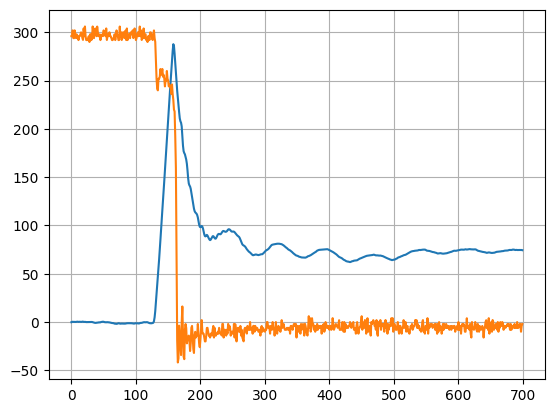

In [270]:
n1_on= 1500
n2_on= 2200


vds2_= vds_ [n1_on:n2_on]
id2_= iD_[n1_on:n2_on]
id2_ = id2_ -id2_[:50].mean()
pon = id2_*vds2_
Eon = np.sum(pon)*Ts
plt.plot(id2_*10)
plt.plot(vds2_)
plt.grid()
print("Eon µJ", Eon*1e6)

In [271]:
f=100e3
poff= Eoff*f
pon = Eon *f
pon , poff

(np.float64(18.97711754819356), np.float64(0.7667743874778308))

In [274]:
print("Eoff µJ", Eoff*1e6)
print("Eon µJ", Eon*1e6)
print(f"for 100khz Pon = {pon}  W Poff = {poff} W")

Eoff µJ 7.667743874778308
Eon µJ 189.77117548193561
for 100khz Pon = 18.97711754819356  W Poff = 0.7667743874778308 W


Eon µJ 862.375441921875

Eoff µJ 58.818522659765634

Eonoff µJ 921.1939645816407

Psw at 100000.0 Hz = 92.11939645816406 W

In [316]:
ton = 1000e-9
Toff = 500e-9
N = 10
L = 370e-6
E=314
I = N*ton*E/L
I

8.486486486486486

# END 